In [1]:
import numpy as np
import h5py
import os, sys, traceback
import os.path as osp
from synthgen import *
from common import *
import wget, tarfile


/home/sp/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
from matplotlib import pyplot as plt

In [3]:
## Define some configuration variables:
NUM_IMG = -1 # no. of images to use for generation (-1 to use all available):
INSTANCE_PER_IMAGE = 1 # no. of times to use the same image
SECS_PER_IMG = 5 #max time per image in seconds


In [4]:
# path to the data-file, containing image, depth and segmentation:
DATA_PATH = 'data'
DB_FNAME = osp.join(DATA_PATH,'dset.h5')
# url of the data (google-drive public file):
DATA_URL = 'http://www.robots.ox.ac.uk/~ankush/data.tar.gz'
OUT_FILE = 'results/SynthText.h5'


In [5]:
def get_data():
  """
  Download the image,depth and segmentation data:
  Returns, the h5 database.
  """
  if not osp.exists(DB_FNAME):
    try:
      colorprint(Color.BLUE,'\tdownloading data (56 M) from: '+DATA_URL,bold=True)
      print
      sys.stdout.flush()
      out_fname = 'data.tar.gz'
      wget.download(DATA_URL,out=out_fname)
      tar = tarfile.open(out_fname)
      tar.extractall()
      tar.close()
      os.remove(out_fname)
      colorprint(Color.BLUE,'\n\tdata saved at:'+DB_FNAME,bold=True)
      sys.stdout.flush()
    except:
      print(colorize(Color.RED,'Data not found and have problems downloading.',bold=True))
      sys.stdout.flush()
      sys.exit(-1)
  # open the h5 file and return:
  return h5py.File(DB_FNAME,'r')


def add_res_to_db(imgname,res,db):
  """
  Add the synthetically generated text image instance
  and other metadata to the dataset.
  """
  ninstance = len(res)
  for i in xrange(ninstance):
    dname = "%s_%d"%(imgname, i)
    db['data'].create_dataset(dname,data=res[i]['img'])
    db['data'][dname].attrs['charBB'] = res[i]['charBB']
    db['data'][dname].attrs['wordBB'] = res[i]['wordBB']        
    db['data'][dname].attrs['txt'] = res[i]['txt']



In [6]:
print(colorize(Color.BLUE,'getting data..',bold=True))
db = get_data()
print(colorize(Color.BLUE,'\t-> done',bold=True))

# open the output h5 file:
out_db = h5py.File(OUT_FILE,'w')
out_db.create_group('/data')
print(colorize(Color.GREEN,'Storing the output in: '+OUT_FILE, bold=True))

getting data..
	-> done


OSError: Unable to create file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

In [7]:
# get the names of the image files in the dataset:
imnames = sorted(db['image'].keys())
N = len(imnames)
global NUM_IMG
if NUM_IMG < 0:
    NUM_IMG = N
start_idx,end_idx = 0,min(NUM_IMG, N)

In [8]:
RV3 = RendererV3(DATA_PATH,max_time=SECS_PER_IMG)
i = 0
imname = imnames[i]

In [9]:
img = Image.fromarray(db['image'][imname][:])
  # get the pre-computed depth:
  #  there are 2 estimates of depth (represented as 2 "channels")
  #  here we are using the second one (in some cases it might be
  #  useful to use the other one):

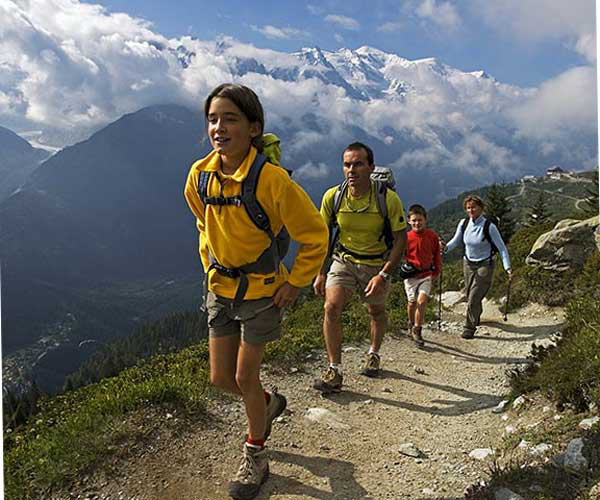

In [10]:
img

In [11]:
depth = db['depth'][imname][:].T
depth = depth[:,:,1]
# get segmentation:
seg = db['seg'][imname][:].astype('float32')
area = db['seg'][imname].attrs['area']
label = db['seg'][imname].attrs['label']

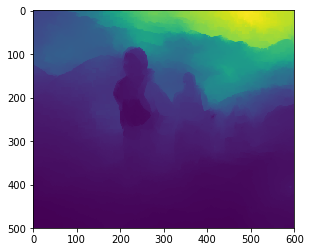

In [12]:
plt.imshow(depth)

In [13]:
# re-size uniformly:
sz = depth.shape[:2][::-1]
img = np.array(img.resize(sz,Image.ANTIALIAS))
seg = np.array(Image.fromarray(seg).resize(sz,Image.NEAREST))

In [14]:
viz = True

In [15]:
print(colorize(Color.RED,'%d of %d'%(i,end_idx-1), bold=True))

0 of 4


 ** instance # : 0


/home/sp/ProjectTestBed/SynthText/synthgen.py:353: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/home/sp/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/sp/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


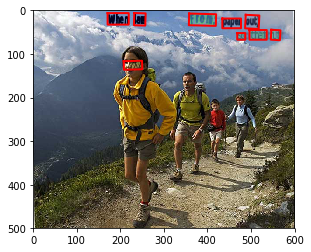

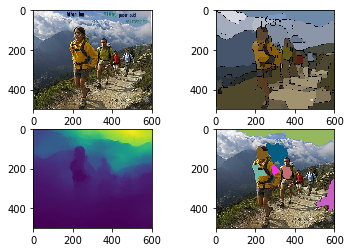

In [16]:
res = RV3.render_text(img,depth,seg,area,label,ninstance=INSTANCE_PER_IMAGE,viz=viz)

In [10]:
  if len(res) > 0:
    # non-empty : successful in placing text:
    add_res_to_db(imname,res,out_db)
  # visualize the output:
  if viz:
    if 'q' in raw_input(colorize(Color.RED,'continue? (enter to continue, q to exit): ',True)):
      break
except:
  traceback.print_exc()
  print colorize(Color.GREEN,'>>>> CONTINUING....', bold=True)
  continue
db.close()
out_db.close()

SyntaxError: invalid syntax (<ipython-input-10-96548d555e16>, line 20)

In [17]:
import cv2 as cv

In [19]:
cv.CHAIN_APPROX_SIMPLE

2